## 1. Read all content of the folder (/dataset/images), Regardless of the file type and file name
in the folder using python. (use os.scandir() or os.listdir() )

In [10]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

path = r"C:\Users\Helya\Desktop\git\digital image processing\exercises\DIP-ex1\data"

os.listdir(path)

['a.jpg', 'b.jpg', 'c.jpg', 'd.png', 'e.jpg']

## 2. Check the type of image ( Color, gray or binary).

In [11]:
import os
import cv2
import numpy as np

path = r"C:\Users\Helya\Desktop\git\digital image processing\exercises\DIP-ex1\data"

# Initialize the fileList
fileList = []

# Populate the fileList with full file paths
for file in os.listdir(path):
    fileList.append(os.path.join(path, file))

def image_name(img_path):
    # Simply return the image name (file name)
    return os.path.basename(img_path)

def num_channel(img):
    if img.ndim == 2:
        return 1  # Single channel (grayscale)
    elif img.ndim == 3:
        return img.shape[-1]  # Number of channels (RGB or RGBA)
    else:
        print('Unexpected image channels')
        return None

def gray_or_binary(img):
    unique_intensities = np.unique(img)
    len_unique_intensities = len(unique_intensities)
    
    if len_unique_intensities > 2:
        return 'Gray'
    elif len_unique_intensities == 2:
        sorted_unique_intensities = np.sort(unique_intensities)
        if sorted_unique_intensities[0] == 0 and (sorted_unique_intensities[1] == 1 or 255):
            return 'Binary'
        else:
            return 'Gray'
    elif len_unique_intensities == 1:
        if unique_intensities[0] in [0, 1, 255]:
            return 'Binary'
        else:
            return 'Gray'
    
    return 'Unknown'

def find_type_of_img(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
    
    number_of_channels = num_channel(img)
    if number_of_channels is None:
        return 'Unknown Image Type'

    if number_of_channels == 4:
        return 'Color image with an alpha channel'
    elif number_of_channels == 3:
        return 'Color'
    elif number_of_channels == 2:
        return 'Gray image with an alpha channel'
    elif number_of_channels == 1:
        return gray_or_binary(img)

# Iterate over each image file in the list and print the type of each image
for img_path in fileList:
    img_name = image_name(img_path)  # Get the image name
    img_type = find_type_of_img(img_path)  # Get the type of the image
    print(f'Type of {img_name} Image is: {img_type}')


Type of a.jpg Image is: Gray
Type of b.jpg Image is: Color
Type of c.jpg Image is: Gray
Type of d.png Image is: Gray
Type of e.jpg Image is: Gray


## If the image is in color, convert it to grayscale, and then find the contrast of the image ( 255 - pixel intensity).

1


error: OpenCV(4.10.0) :-1: error: (-5:Bad argument) in function 'imread'
> Overload resolution failed:
>  - Expected 'filename' to be a str or path-like object
>  - Expected 'filename' to be a str or path-like object
>  - Expected 'filename' to be a str or path-like object


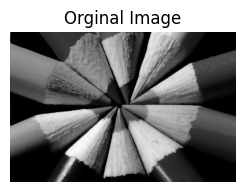

In [ ]:
from skimage import color
from skimage import io

for img in fileList:
    if find_type_of_img(img) == 'Color':
        new_img = color.rgb2gray(io.imread(img))


plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.title('Orginal Image')
plt.axis('off')

plt.subplot(1,2,2)
inverted_gray = inverted_img(gray)
plt.imshow(inverted_gray,cmap ='gray')
plt.title('Inverted Image')
plt.axis('off')
